# Simple linear regression using PyTorch


In [1]:
import os
import pandas as pd

In [2]:
# load data
df = pd.read_csv(os.path.join("../data", "housing.csv"))
df.dropna()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
Y = df["Price"].values
Y.shape

(5000,)

In [4]:
X = df.drop(["Price", "Address"], axis=1).values
X.shape

(5000, 5)

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Let's check the column names in our DataFrame
print("Available columns:", df.columns.tolist())

Available columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']


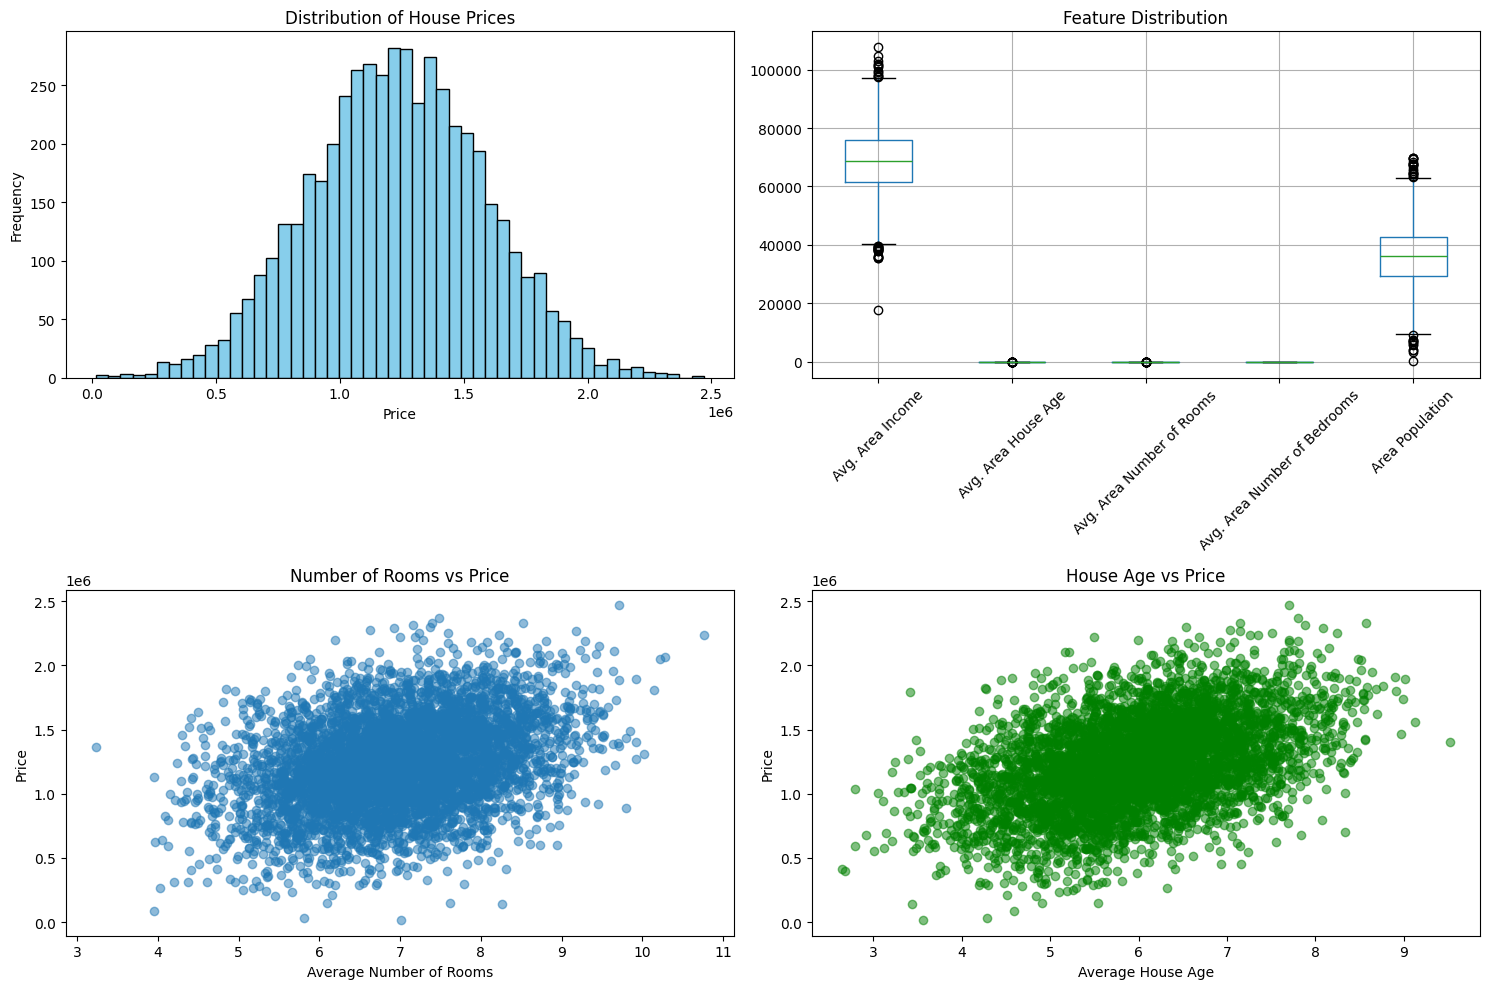

In [7]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of house prices
plt.subplot(2, 2, 1)
plt.hist(Y, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 2: Box plot of features
plt.subplot(2, 2, 2)
df.drop(['Price', 'Address'], axis=1).boxplot(figsize=(10, 6))
plt.title('Feature Distribution')
plt.xticks(rotation=45)

# Plot 3: Correlation between Number of Rooms and Price
plt.subplot(2, 2, 3)
plt.scatter(df['Avg. Area Number of Rooms'], df['Price'], alpha=0.5)
plt.title('Number of Rooms vs Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')

# Plot 4: Correlation between House Age and Price
plt.subplot(2, 2, 4)
plt.scatter(df['Avg. Area House Age'], df['Price'], alpha=0.5, color='green')
plt.title('House Age vs Price')
plt.xlabel('Average House Age')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

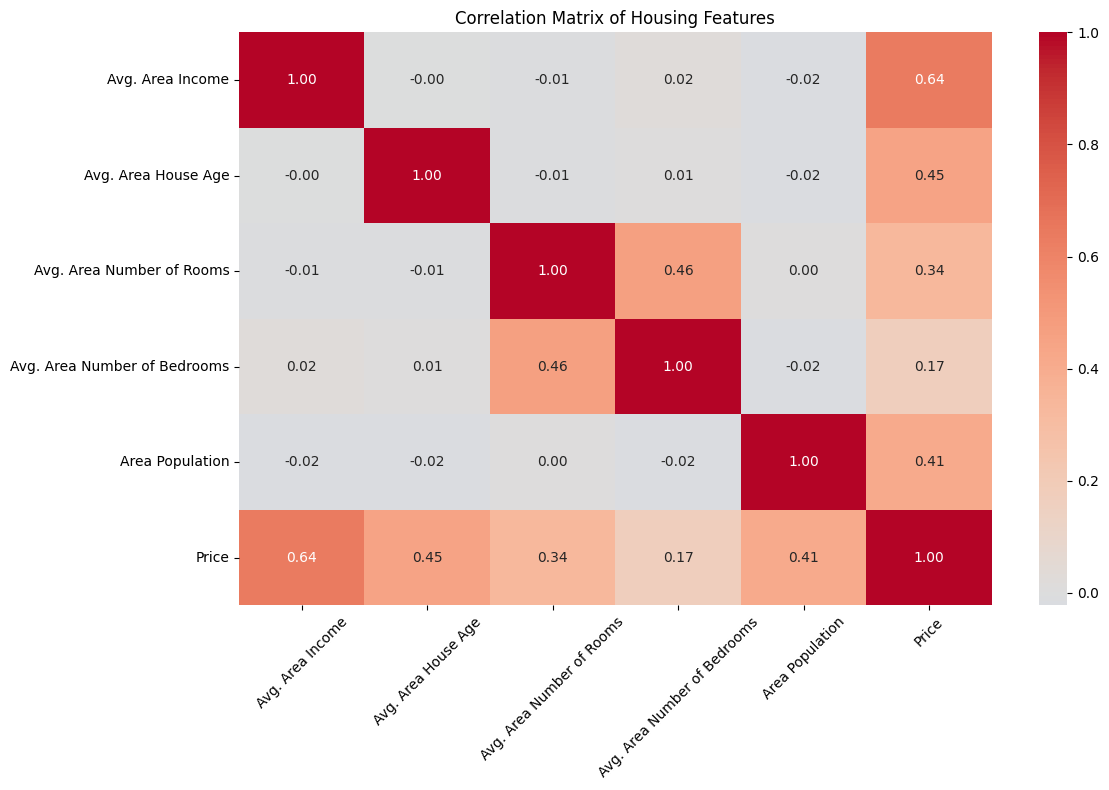

In [8]:
# Create a correlation matrix heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('Address', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Housing Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

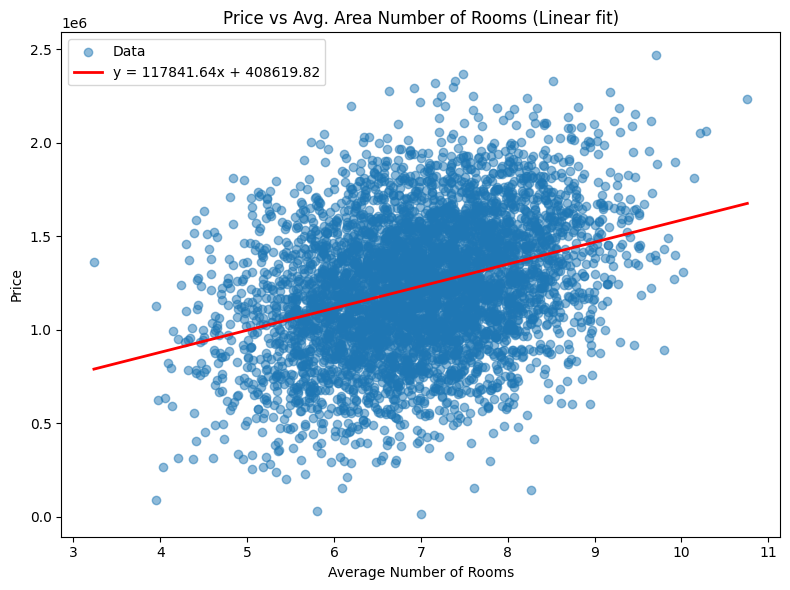

m = 117841.637573, c = 408619.82


In [12]:
# Price vs Avg. Area Number of Rooms with linear fit y = m*x + c
import numpy as np
from sklearn.linear_model import LinearRegression

# prepare data
X_rooms = df[["Avg. Area Number of Rooms"]].values.reshape(-1, 1)
y_price = df['Price'].values

# fit linear model
model = LinearRegression()
model.fit(X_rooms, y_price)
m = model.coef_[0]
c = model.intercept_

# line for plotting
x_line = np.linspace(X_rooms.min(), X_rooms.max(), 100)
y_line = m * x_line + c

# plot
plt.figure(figsize=(8, 6))
plt.scatter(X_rooms, y_price, alpha=0.5, label='Data')
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {m:.2f}x + {c:.2f}')
plt.title('Price vs Avg. Area Number of Rooms (Linear fit)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# print coefficients for reference
print(f'm = {m:.6f}, c = {c:.2f}')